In [1]:
import storypy
from storypy.preprocess import ESMValProcessor, parse_config
from esmvaltool.diag_scripts.shared import run_diagnostic, get_cfg, group_metadata
from esmvaltool.diag_scripts.shared._base import _get_input_data_files

In [2]:
user_config = dict(
        work_dir='/climca/people/storylinetool/esmvaltool_output/monerie_CMIP6_20250725_181803/work',
        plot_dir='/climca/people/storylinetool/esmvaltool_output/monerie_CMIP6_20250725_181803/plots',
        var_name=['pr'],
        exp_name='ssp585',
        freq='mon',
        grid='g025',
        region_method='box',
        period1 = ['1960', '1999'],
        period2 = ['2060', '2099'],
        region_id=18,
        season=(7,8,9),  # Now provided as a tuple of months
        region_extents=[(-20, 60, -60, 40)],
        box=(-30,30,-30,30),
        titles=["Region A", "Region B"]
    )
"""
driver_config = dict(
        var_name=['psl'],            # <- actual variable names in NetCDF
        short_name=['test_ubi'],           # <- names for regression/CSV outputs
        period1=['1960', '1979'],
        period2=['2070', '2099'],
        season=[12,1,2],
        box={'lat_min': 50, 'lat_max': 70, 'lon_min': 40, 'lon_max': 70},
        work_dir='/climca/people/storylinetool/test_user/driver_test_outputs'
    )
"""
# Load the configuration file
config= parse_config('/climca/people/ralawode/esmvaltool_output/test_recipe_20251014_135020/run/storyline_analysis/multiple_regresion/settings.yml')

In [8]:
processor_target = ESMValProcessor(config, user_config)

/climca/people/ralawode/storypy/storypy/preprocess/_diagnostics.py:44: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_coord = xr.cftime_range(start=data.indexes['time'].to_datetimeindex()[0], periods=data['time'].size, freq='ME')
/climca/people/ralawode/storypy/storypy/preprocess/_diagnostics.py:44: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_coord = xr.cftime_range(start=data.indexes['time'].to_datetimeindex()[0], periods=data['time'].size, freq='ME')
/climca/people/ralawode/storypy/storypy/preprocess/_diagnostics.py:44: RuntimeWarning: Converting a CF

Saved ensemble mean data to /climca/people/storylinetool/esmvaltool_output/monerie_CMIP6_20250725_181803/work/target_pr.nc
Target Change Extent:
Longitude: -63.75 to 43.75
Latitude: -23.75 to 63.75
Aligning p_values...
P-Values Extent:
Longitude: -63.75 to 43.75
Latitude: -23.75 to 63.75
Aligning positives_model and negatives_model...
Positives Model Extent:
Longitude: 1.25 to 43.75
Latitude: -23.75 to 63.75
Negatives Model Extent:
Longitude: 1.25 to 43.75
Latitude: -23.75 to 63.75
Adding p_values stippling...
Adding positives/negatives stippling...


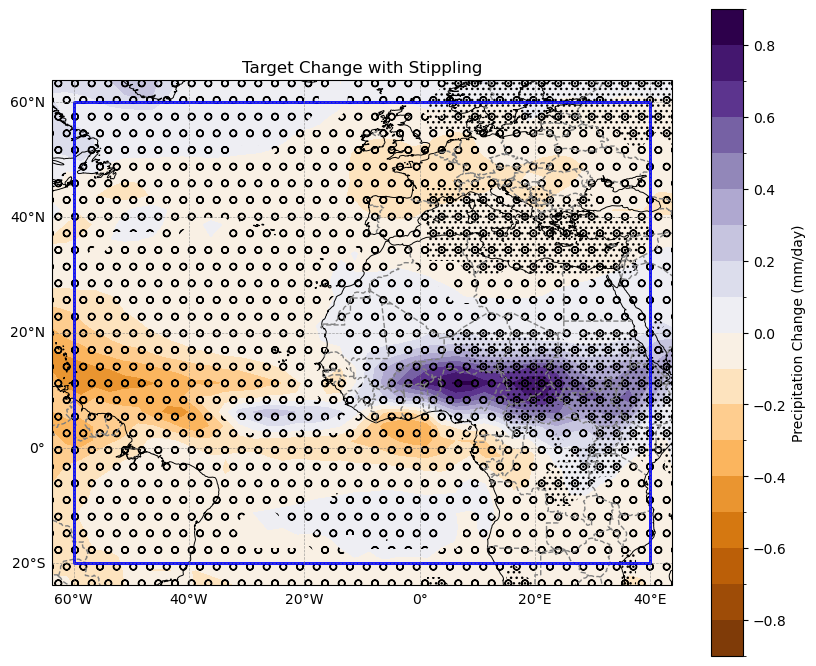

In [9]:
processor_target.process_var()

In [10]:
from storypy.compute import run_regression

main_config = dict(
        work_dir='/climca/people/storylinetool/esmvaltool_output/monerie_CMIP6_20250725_181803/work',
        target_variable=['pr']
    )

outputs = run_regression(main_config)

This is regressor_coefs: <xarray.Dataset> Size: 39kB
Dimensions:  (lat: 36, lon: 44)
Coordinates:
  * lat      (lat) float64 288B -23.75 -21.25 -18.75 ... 58.75 61.25 63.75
  * lon      (lon) float64 352B -63.75 -61.25 -58.75 ... 38.75 41.25 43.75
    height   float64 8B 2.0
Data variables:
    pr       (lat, lon) float64 13kB -0.06845 -0.0595 -0.16 ... 0.03206 0.03627
    eum      (lat, lon) float64 13kB 0.003482 0.02769 ... 0.004757 0.001323
    naw      (lat, lon) float64 13kB -0.0041 0.007842 ... 0.005351 0.007305
Regression completed for: pr


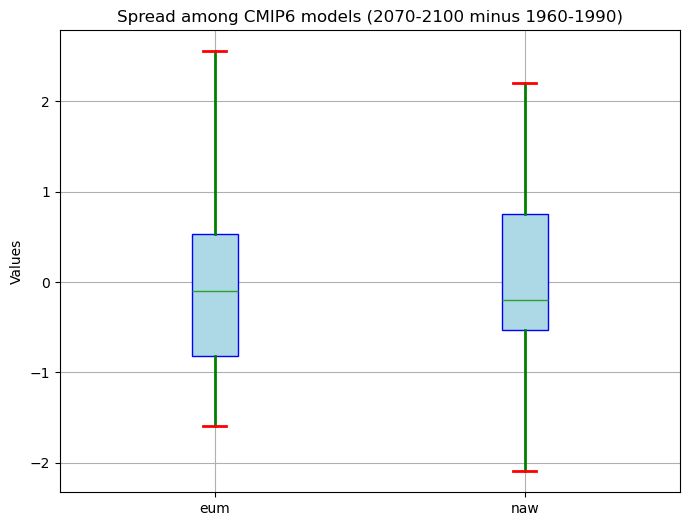

In [11]:
# Make a boxplot.
from storypy.data import read_drivers
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
# Plot boxplot of Tropical Warming, Polar Warming and Stratospheric Polar Vortex

user_config = dict(
        work_dir='/climca/people/storylinetool/esmvaltool_output/monerie_CMIP6_20250725_181803/work',
        plot_dir='/climca/people/storylinetool/esmvaltool_output/monerie_CMIP6_20250725_181803/plots',
    )

# Directly read the drivers from the output file in the work_dir.
driver_path = os.path.join(user_config['work_dir'], "storyline_analysis/multiple_regresion/remote_drivers/scaled_standardized_drivers.csv")
rds = pd.read_csv(driver_path, index_col=0)

models = rds.index.tolist()
# Boxplot with customizations
plt.figure(figsize=(8, 6))
rds.boxplot(patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='green', linewidth=2),
           capprops=dict(color='red', linewidth=2),
           flierprops=dict(marker='o', color='black', markersize=8))

plt.title('Spread among CMIP6 models (2070-2100 minus 1960-1990)')
plt.ylabel('Values')
plt.show()

## STORLINE ANALYSIS WITH PLOTS

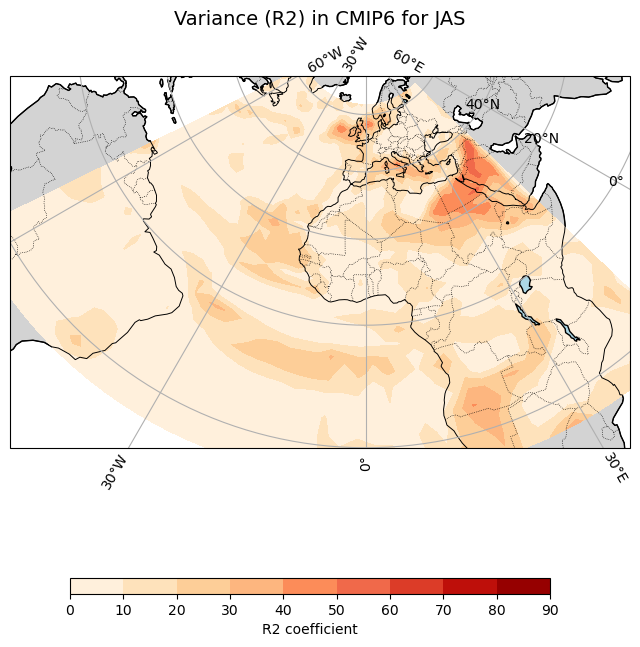

In [17]:
from storypy.evaluate.plot import hemispheric_plot
import os
import xarray as xr
import numpy as np

# Or directly read the data from the output file in the work_dir.
data_path = os.path.join(user_config['work_dir'], "regression_output/pr/R2.nc")
data = xr.open_dataset(data_path).pr * 200

levels = np.arange(0, 100, 10)
extent=[-60, 40, -20, 60]
hemispheric_plot(data, levels, extent, cmap="OrRd", title="Variance (R2) in CMIP6 for JAS", colorbar_label="R2 coefficient")

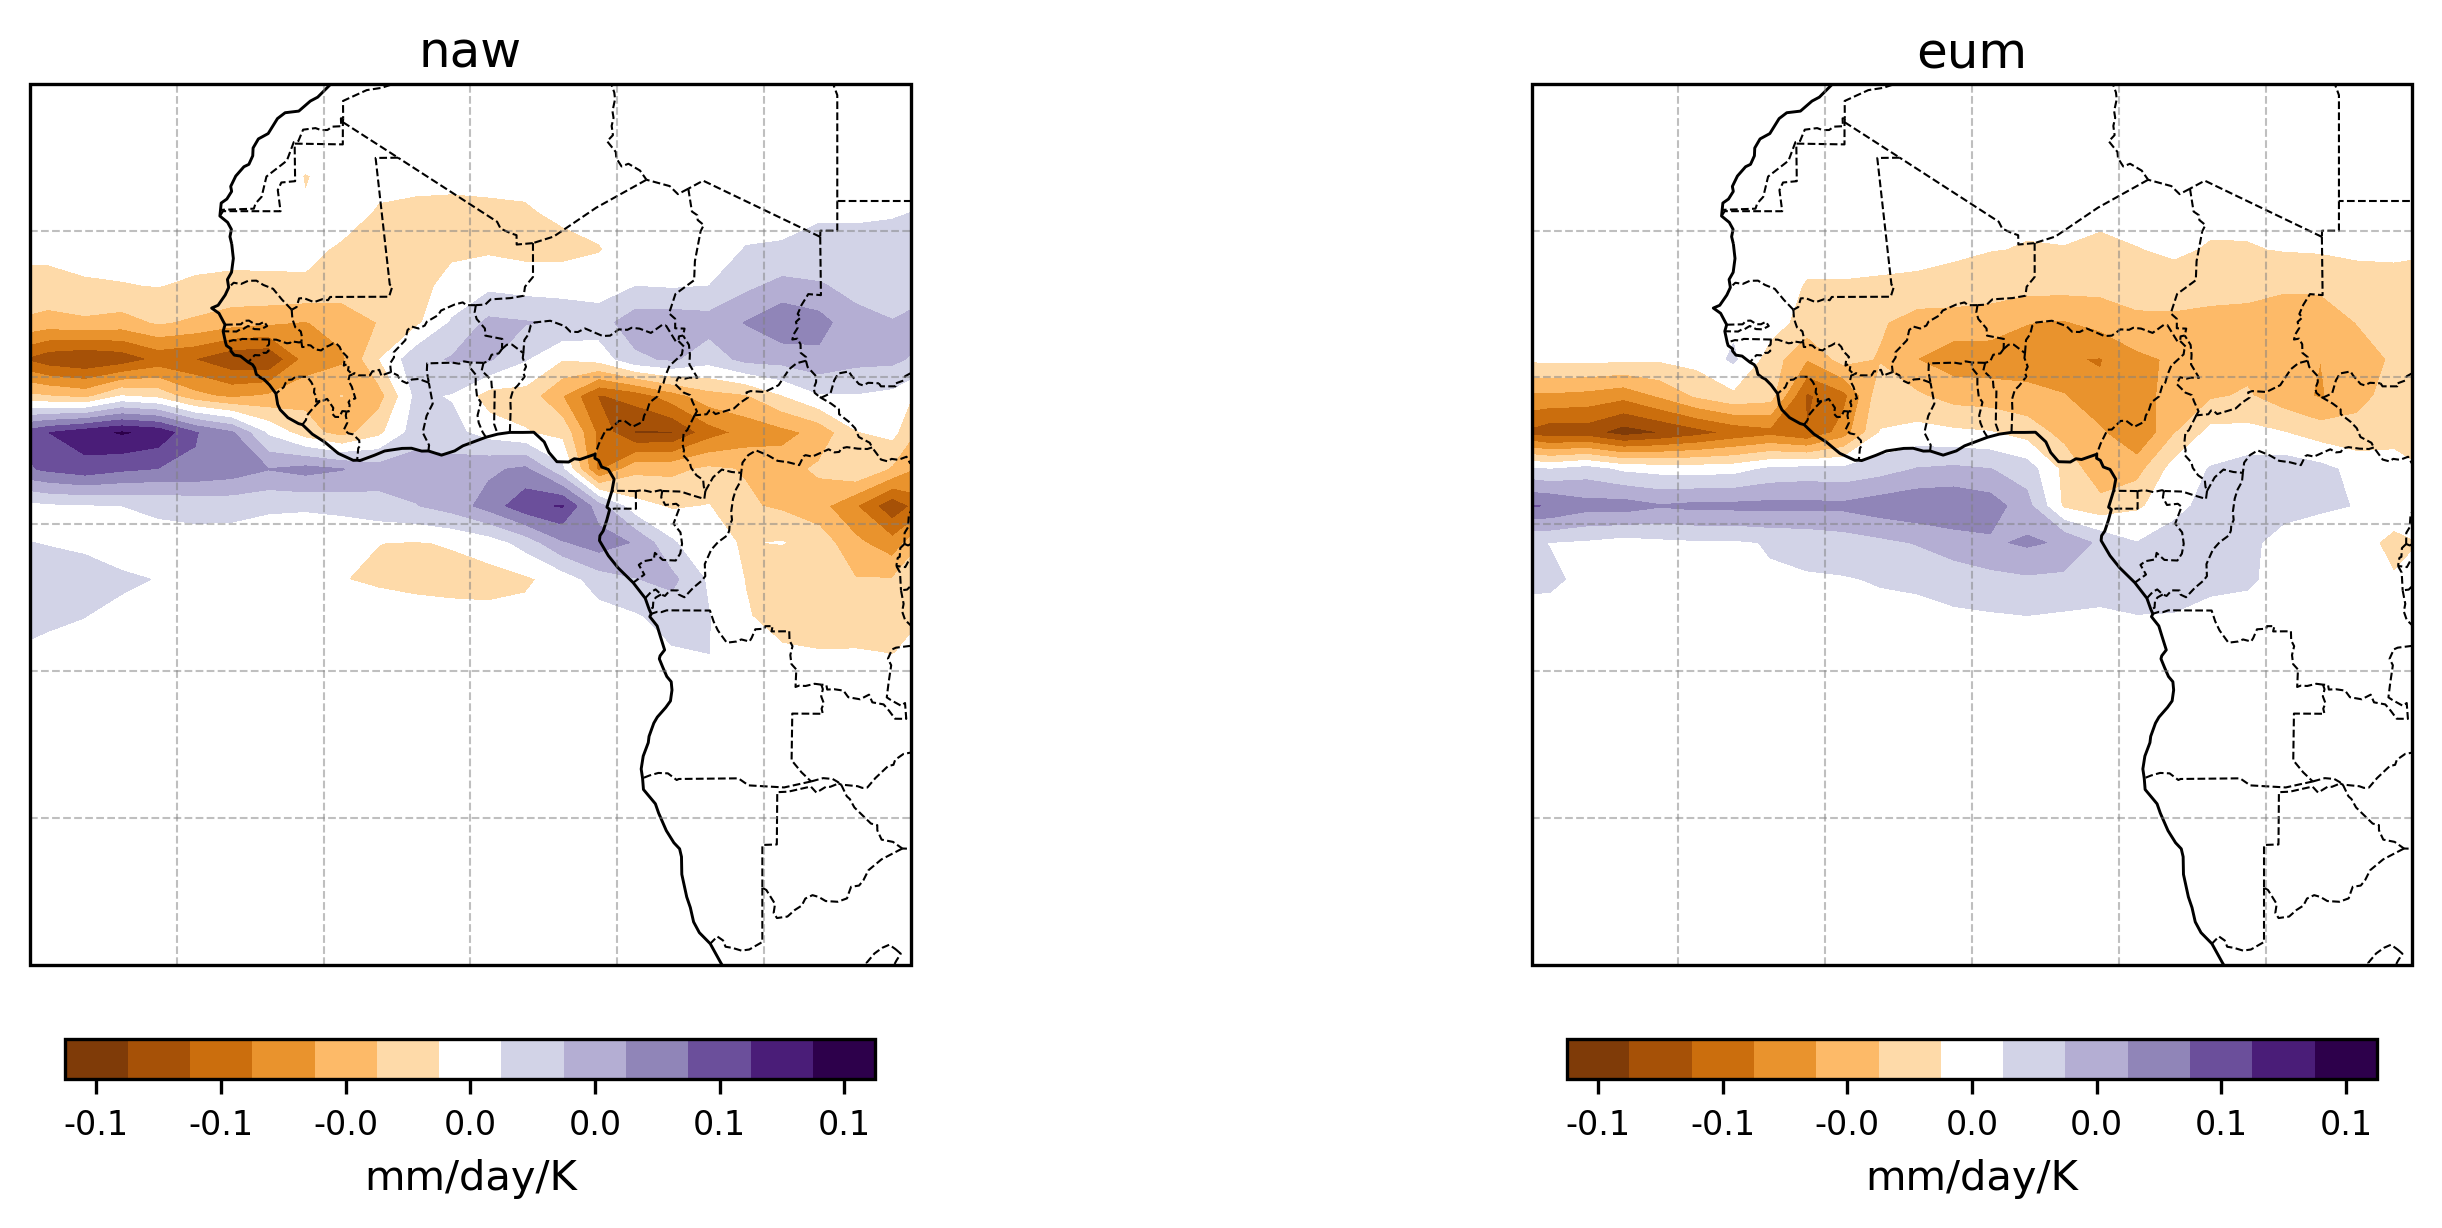

In [3]:
# from storypy.data import read_pr_regression_coefficients
from storypy.evaluate.plot import create_three_panel_figure, regression_coefficient, create_multi_panel_figure
import numpy as np

target = 'pr'
drivers = ['naw', 'eum']
storyline_coefficient = 1.26

coefficients, titles = regression_coefficient(user_config, target, drivers, storyline_coefficient)

levels = [np.arange(-.08, .09, .01)] * 3
extent = [user_config["box"]] * 3
cmaps = ['PuOr'] * 3

# titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = create_multi_panel_figure(coefficients, extent, cmaps, titles, colorbar_label="mm/day/K")

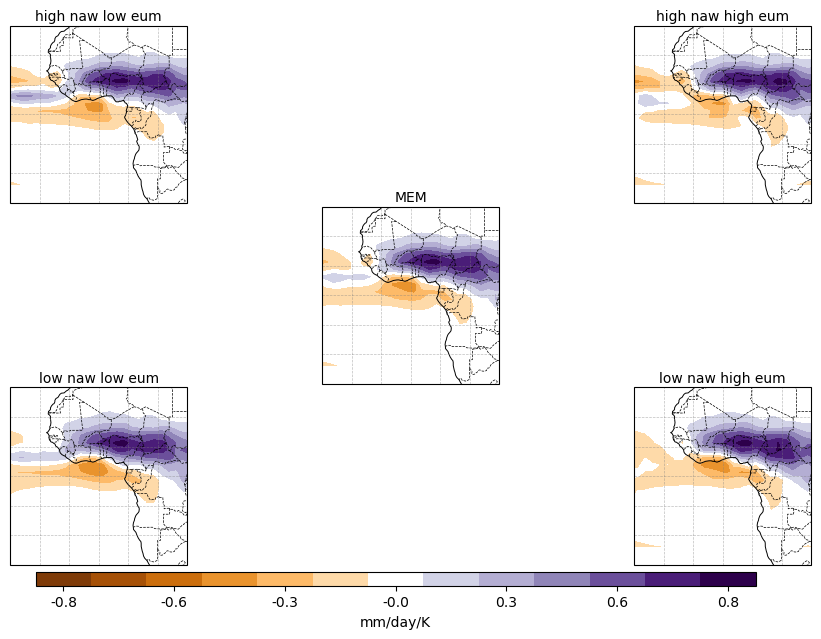

In [27]:
from storypy.evaluate.plot import create_five_panel_figure, storyline_evaluation

target = 'pr'
drivers = ['eum', 'naw']

# --- Call the function ---
storyline_coefficient = 1.26
storylines, titles = storyline_evaluation(user_config, target, drivers, storyline_coefficient)

# --- Plotting setup ---
cmaps = ['PuOr'] * 5
levels = [np.arange(-.3, .35, .05)] * 5
extent = [user_config["box"]] * 5

fig = create_five_panel_figure(
    storylines, extent, levels, cmaps, titles,
    colorbar_label="mm/day/K"
)

['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2-WACCM', 'CESM2', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5-1', 'CanESM5-CanOE', 'CanESM5', 'E3SM-1-0', 'EC-Earth3', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GISS-E2-1-G', 'GISS-E2-1-H', 'GISS-E2-2-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'KIOST-ESM', 'MCM-UA-1-0', 'MIROC-ES2H', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']
90.0
90.0
90.0


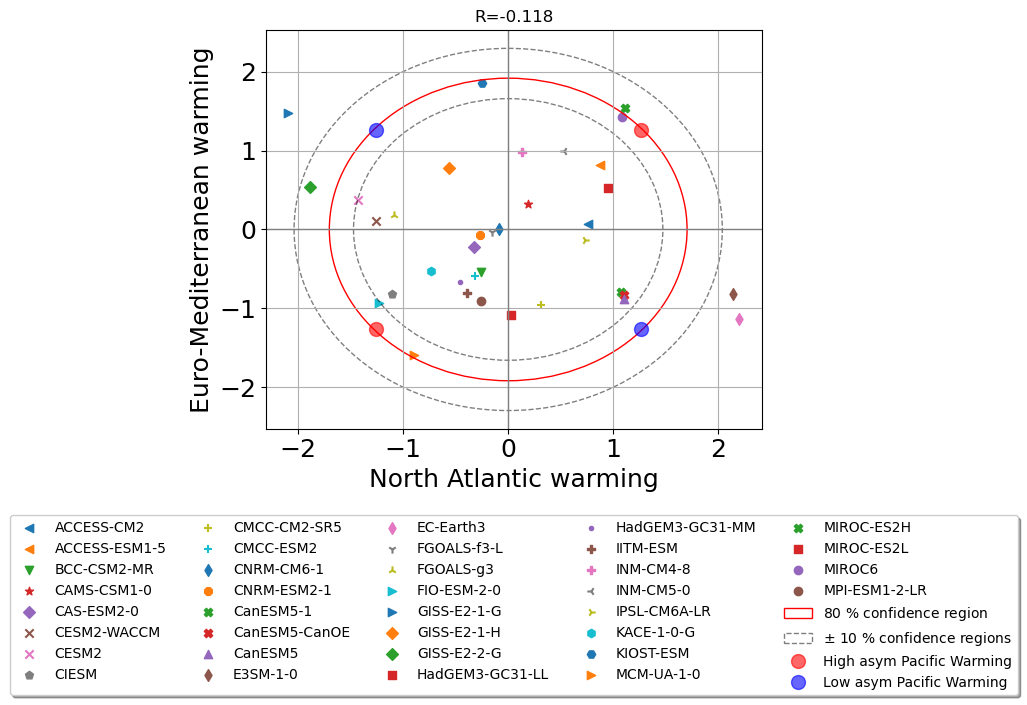

In [30]:
from storypy.evaluate.plot import plot_ellipse
import pandas as pd

driver_path = os.path.join(user_config['work_dir'], "storyline_analysis/multiple_regresion/remote_drivers/scaled_standardized_drivers.csv")
rds = pd.read_csv(driver_path, index_col=0).dropna()

models = rds.index.tolist()
fig = plot_ellipse(models,rds["naw"].values,rds["eum"].values,corr="no",x_label="North Atlantic warming",y_label="Euro-Mediterranean warming",)